In [3]:
import pandas as pd
from scipy.stats import ttest_ind

# 1. Load Data
df_road = pd.read_parquet('paquets/data_roads.parquet')

# 2. List of Features
features = ['Bump', 'Crossing', 'Junction', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Signal']

print(f"{'FEATURE':<15} | {'COUNT':<8} | {'SEV 4 % (Fatal)':<16} | {'AVG DURATION':<12} | {'IMPACT':<25}")
print("=" * 95)

for feat in features:
    if feat in df_road.columns:
        # Split Groups
        yes = df_road[df_road[feat] == True]
        no = df_road[df_road[feat] == False]
        
        # --- METRIC 1: FREQUENCY (Count) ---
        count = len(yes)
        
        # --- METRIC 2: FATALITY RATE (% of Severity 4) ---
        # How likely is someone to die if they crash here?
        fatal_rate_yes = (len(yes[yes['Severity'] == 4]) / len(yes)) * 100 if len(yes) > 0 else 0
        fatal_rate_no  = (len(no[no['Severity'] == 4]) / len(no)) * 100
        
        # --- METRIC 3: TRAFFIC DELAY (Duration) ---
        dur_yes = yes['Duration'].mean()
        dur_no = no['Duration'].mean()
        
        # --- STATISTICAL SIGNIFICANCE (T-Test on Severity) ---
        stat, p = ttest_ind(yes['Severity'], no['Severity'], equal_var=False)
        sig_icon = "🔴" if p < 0.05 and fatal_rate_yes > fatal_rate_no else "🟢" if p < 0.05 else "⚪"
        
        # FORMATTED PRINT
        # Shows: Feature Name | Total Accidents | Fatality Rate vs Normal | Traffic Delay
        print(f"{feat:<15} | {count:<8} | {fatal_rate_yes:5.2f}% vs {fatal_rate_no:5.2f}% | {dur_yes:6.1f} min | {sig_icon} Diff: {(fatal_rate_yes - fatal_rate_no):+.2f}% Risk")

print("-" * 95)
print("LEGEND: 🔴 = Significantly More Dangerous | 🟢 = Significantly Safer | ⚪ = No Statistical Difference")

FEATURE         | COUNT    | SEV 4 % (Fatal)  | AVG DURATION | IMPACT                   
Bump            | 3111     |  0.90% vs  2.63% |  116.2 min | 🟢 Diff: -1.73% Risk
Crossing        | 807798   |  1.53% vs  2.78% |  101.5 min | 🟢 Diff: -1.25% Risk
Junction        | 519836   |  3.63% vs  2.55% |  132.9 min | 🔴 Diff: +1.08% Risk
Railway         | 61582    |  2.26% vs  2.63% |  106.2 min | 🟢 Diff: -0.38% Risk
Roundabout      | 220      |  2.73% vs  2.63% |   85.6 min | 🔴 Diff: +0.10% Risk
Station         | 181724   |  1.42% vs  2.66% |  121.7 min | 🟢 Diff: -1.25% Risk
-----------------------------------------------------------------------------------------------
LEGEND: 🔴 = Significantly More Dangerous | 🟢 = Significantly Safer | ⚪ = No Statistical Difference


C:\Users\hp\AppData\Local\Temp\ipykernel_8136\33186117.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Feature', y='Fatality Rate (%)', palette='Reds_r')


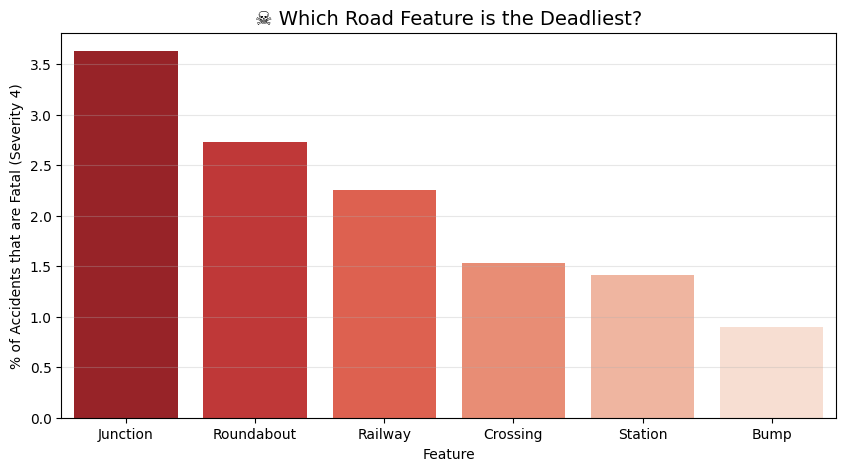

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
plot_data = []
for feat in features:
    if feat in df_road.columns:
        # Calculate Fatality Rate for "Yes" group
        subset = df_road[df_road[feat] == True]
        if len(subset) > 0:
            rate = (len(subset[subset['Severity'] == 4]) / len(subset)) * 100
            plot_data.append({'Feature': feat, 'Fatality Rate (%)': rate})

# Plot
df_plot = pd.DataFrame(plot_data).sort_values('Fatality Rate (%)', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_plot, x='Feature', y='Fatality Rate (%)', palette='Reds_r')
plt.title('☠️ Which Road Feature is the Deadliest?', fontsize=14)
plt.ylabel('% of Accidents that are Fatal (Severity 4)')
plt.grid(axis='y', alpha=0.3)
plt.show()